In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

from  sklearn.preprocessing import StandardScaler

In [2]:
import os, types
import pandas as pd
import numpy as np
df= pd.read_excel('Predicted_data.xlsx')
df.head()

,s_id,name,profile_link,tier,gender,branch,cgpa,inter_gpa,ssc_gpa,internships,...,is_participated_extracurricular,no_of_programming_languages,dsa,mobile_dev,web_dev,Machine Learning,cloud,other_skills,is_placed,salary_as_fresher
0,1.0,NaN,https://www.linkedin.com/in/shubham-yadav-b862...,1,M,CSE,NaN,NaN,10.0,2.0,...,1.0,4.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,30.0
1,2.0,NaN,https://www.linkedin.com/in/pranav-patel-97780...,1,M,CSE,NaN,NaN,10.0,1.0,...,1.0,4.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,15.0
2,3.0,NaN,https://www.linkedin.com/in/kshitij-garg/,1,M,CSE,NaN,NaN,NaN,1.0,...,1.0,5.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,22.0
3,4.0,NaN,https://www.linkedin.com/in/akash-garg-5757a290/,1,M,CSE,9.59,NaN,10.0,3.0,...,1.0,5.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,14.0
4,5.0,NaN,https://www.linkedin.com/in/shubham-jadhav-493...,1,M,CSE,NaN,NaN,9.8,3.0,...,1.0,3.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,11.0


In [3]:
df.columns

Index(['s_id', 'name', 'profile_link', 'tier', 'gender', 'branch', 'cgpa',
       'inter_gpa', 'ssc_gpa', 'internships', 'no_of_projects',
       'is_participate_hackathon', 'is_participated_extracurricular',
       'no_of_programming_languages', 'dsa', 'mobile_dev', 'web_dev',
       'Machine Learning', 'cloud', 'other_skills', 'is_placed',
       'salary_as_fresher'],
      dtype='object')

In [4]:
df.drop(columns=['s_id','name','profile_link','gender'],inplace=True)

In [5]:
df

,tier,branch,cgpa,inter_gpa,ssc_gpa,internships,no_of_projects,is_participate_hackathon,is_participated_extracurricular,no_of_programming_languages,dsa,mobile_dev,web_dev,Machine Learning,cloud,other_skills,is_placed,salary_as_fresher
0,1,CSE,NaN,NaN,10.0,2.0,5.0,1.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,30.0
1,1,CSE,NaN,NaN,10.0,1.0,4.0,1.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,15.0
2,1,CSE,NaN,NaN,NaN,1.0,5.0,1.0,1.0,5.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,22.0
3,1,CSE,9.59,NaN,10.0,3.0,8.0,1.0,1.0,5.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,14.0
4,1,CSE,NaN,NaN,9.8,3.0,4.0,1.0,1.0,3.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,3,ECE,8.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
141,3,ECE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142,3,ECE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

tier                                 0
branch                               2
cgpa                                13
inter_gpa                           61
ssc_gpa                             60
internships                          5
no_of_projects                       5
is_participate_hackathon             5
is_participated_extracurricular      5
no_of_programming_languages          5
dsa                                  5
mobile_dev                           5
web_dev                              5
Machine Learning                     5
cloud                                5
other_skills                       123
is_placed                            5
salary_as_fresher                    5
dtype: int64

In [7]:
import seaborn as sea
import matplotlib.pyplot as plt

df['inter_gpa'] = df['inter_gpa'].fillna(df['inter_gpa'].mean())
df['ssc_gpa'] = df['ssc_gpa'].fillna(df['ssc_gpa'].mean())
df['cgpa'] = df['cgpa'].fillna(df['cgpa'].mean())

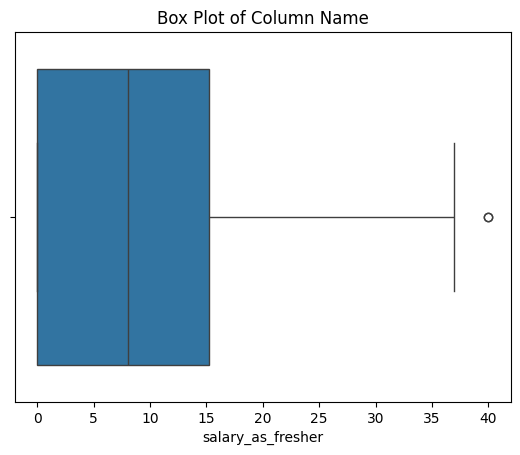

In [8]:
sea.boxplot(x=df['salary_as_fresher'], data=df)
plt.title('Box Plot of Column Name')
plt.show()


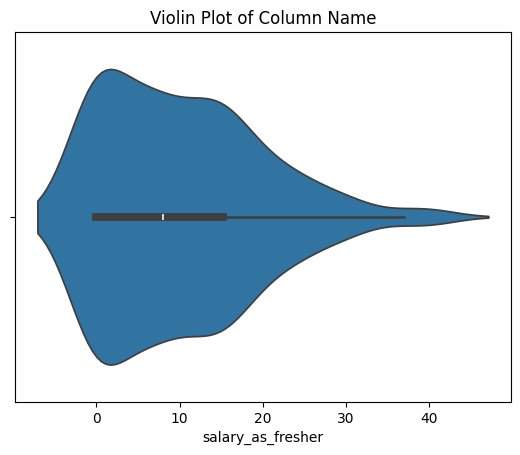

In [9]:

# Create a violin plot to visualize outliers
sea.violinplot(x=df['salary_as_fresher'], data=df)
plt.title('Violin Plot of Column Name')
plt.show()


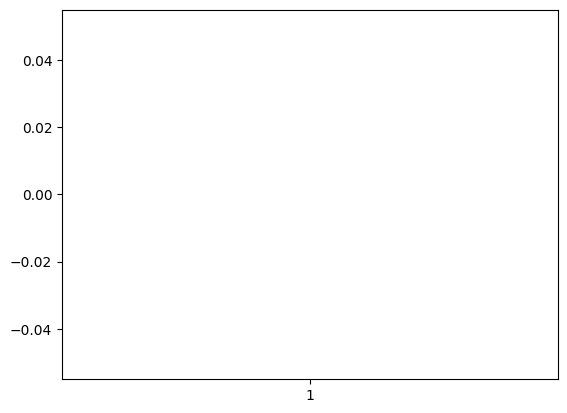

<Figure size 1000x700 with 0 Axes>

In [10]:
plt.boxplot(df['salary_as_fresher'])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [11]:
df.columns

Index(['tier', 'branch', 'cgpa', 'inter_gpa', 'ssc_gpa', 'internships',
       'no_of_projects', 'is_participate_hackathon',
       'is_participated_extracurricular', 'no_of_programming_languages', 'dsa',
       'mobile_dev', 'web_dev', 'Machine Learning', 'cloud', 'other_skills',
       'is_placed', 'salary_as_fresher'],
      dtype='object')

<Axes: >

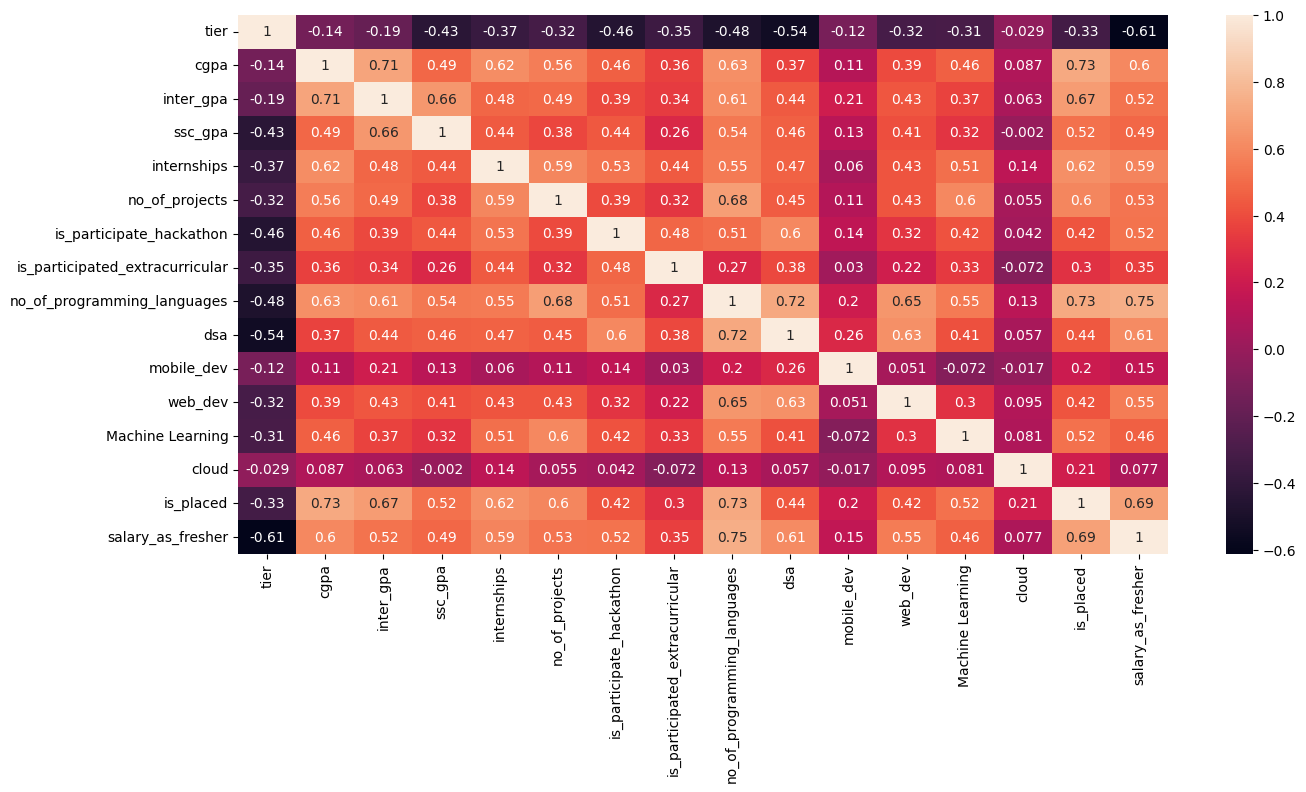

In [12]:
numeric_df=df.select_dtypes(include=[np.number])
fig = plt.figure(figsize =(15, 7))
sea.heatmap(numeric_df.corr(),annot=True)

In [13]:
df.branch.unique()

array(['CSE', 'ECE', 'MECH', 'EEE', nan], dtype=object)

In [14]:
dummy = pd.get_dummies(df.branch)

In [15]:
df=pd.concat([df,dummy],axis=1)

In [16]:
df.shape

(145, 22)

In [17]:
# most frequent values filling here
#df['other_skills'].fillna(df['other_skills'].mode()[0], inplace=True)


In [18]:
df.other_skills.isnull().sum()

123

In [19]:
df.drop(columns=['EEE','branch','other_skills','ssc_gpa','inter_gpa'],inplace=True)


In [20]:
df.isnull().sum()

tier                               0
cgpa                               0
internships                        5
no_of_projects                     5
is_participate_hackathon           5
is_participated_extracurricular    5
no_of_programming_languages        5
dsa                                5
mobile_dev                         5
web_dev                            5
Machine Learning                   5
cloud                              5
is_placed                          5
salary_as_fresher                  5
CSE                                0
ECE                                0
MECH                               0
dtype: int64

In [21]:
#dummy2=pd.get_dummies(df['other_skills'])

In [23]:
#df['other_skills'].value_counts()
#df.other_skills.unique()

In [24]:
#df=pd.concat([df,dummy2],axis=1)
#df.drop(columns=['other_skills','verilog,vlsi cad,matlab'
#],inplace=True)

In [25]:
X = df.drop(columns=['salary_as_fresher','is_placed'],axis=1)
y=df['salary_as_fresher']

In [26]:
X

,tier,cgpa,internships,no_of_projects,is_participate_hackathon,is_participated_extracurricular,no_of_programming_languages,dsa,mobile_dev,web_dev,Machine Learning,cloud,CSE,ECE,MECH
0,1,8.165758,2.0,5.0,1.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,True,False,False
1,1,8.165758,1.0,4.0,1.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,True,False,False
2,1,8.165758,1.0,5.0,1.0,1.0,5.0,1.0,0.0,1.0,1.0,0.0,True,False,False
3,1,9.590000,3.0,8.0,1.0,1.0,5.0,1.0,0.0,1.0,1.0,0.0,True,False,False
4,1,8.165758,3.0,4.0,1.0,1.0,3.0,1.0,0.0,1.0,1.0,0.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,3,8.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False
141,3,8.165758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False
142,3,8.165758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False
143,3,8.165758,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False


In [27]:
y.shape

(145,)

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=3)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a dictionary containing different regression models
models = {
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor(),
    'DecisionTreeRegressor': DecisionTreeRegressor()
}

# Loop through each model in the dictionary
for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train.dropna(), y_train.dropna())

    # Predict on training and testing sets
    y_train_pred = model.predict(X_train.dropna())
    y_test_pred = model.predict(X_test.dropna())

    # Calculate performance metrics for training set
    model_train_mse = mean_squared_error(y_train.dropna(), y_train_pred)
    model_train_r2 = r2_score(y_train.dropna(), y_train_pred)

    # Calculate performance metrics for testing set
    model_test_mse = mean_squared_error(y_test.dropna(), y_test_pred)
    model_test_r2 = r2_score(y_test.dropna(), y_test_pred)

    # Print model performance metrics
    print('\n')
    print(model_name)
    print("=" * 25)
    
    # Print performance metrics for training set
    print("Performance of the model on training set:")
    print('-', "Mean Squared Error =", model_train_mse)
    print('-', "R-squared =", model_train_r2)

    print('\n')
    # Print performance metrics for testing set
    print("Performance of the model on testing set:")
    print('-', "Mean Squared Error =", model_test_mse)
    print('-', "R-squared =", model_test_r2)

    print("=" * 40)




LinearRegression
Performance of the model on training set:
- Mean Squared Error = 24.922126763183346
- R-squared = 0.7266896135198765


Performance of the model on testing set:
- Mean Squared Error = 30.9539138080011
- R-squared = 0.478648525705232


RandomForestRegressor
Performance of the model on training set:
- Mean Squared Error = 4.420707011408731
- R-squared = 0.95151998249249


Performance of the model on testing set:
- Mean Squared Error = 41.985960071428565
- R-squared = 0.292837657987454


DecisionTreeRegressor
Performance of the model on training set:
- Mean Squared Error = 0.008928571428571428
- R-squared = 0.9999020841467084


Performance of the model on testing set:
- Mean Squared Error = 145.59214285714285
- R-squared = -1.4521835524619746


In [30]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()


In [31]:
model.fit(X_train.dropna(),y_train.dropna())

RandomForestRegressor()

In [32]:
model.score(X_train.dropna(),y_train.dropna())

0.9546310291340295

In [33]:
print(X_train.dropna())

     tier      cgpa  internships  no_of_projects  is_participate_hackathon  \
41      2  9.300000          3.0             4.0                       1.0   
5       1  8.310000          1.0             6.0                       0.0   
124     2  6.100000          0.0             1.0                       0.0   
51      1  9.250000          2.0             3.0                       1.0   
99      3  6.400000          0.0             0.0                       0.0   
..    ...       ...          ...             ...                       ...   
107     3  9.700000          2.0             2.0                       0.0   
21      2  8.450000          1.0             3.0                       1.0   
0       1  8.165758          2.0             5.0                       1.0   
131     2  7.300000          0.0             1.0                       1.0   
106     3  8.500000          2.0             3.0                       0.0   

     is_participated_extracurricular  no_of_programming_languag

In [34]:
pre_salary=model.predict(X_test.dropna())

In [35]:
pre_salary

array([16.11 , 19.035, 25.83 , 11.997, 14.582,  4.475, 19.68 , 13.43 ,
       11.005, 29.85 , 18.836, 11.74 , 23.825,  3.93 ])

In [36]:
X_test

,tier,cgpa,internships,no_of_projects,is_participate_hackathon,is_participated_extracurricular,no_of_programming_languages,dsa,mobile_dev,web_dev,Machine Learning,cloud,CSE,ECE,MECH
25,2,9.63,4.0,2.0,0.0,1.0,3.0,1.0,0.0,1.0,1.0,0.0,True,False,False
6,1,8.10,0.0,6.0,0.0,1.0,4.0,1.0,0.0,1.0,1.0,0.0,True,False,False
3,1,9.59,3.0,8.0,1.0,1.0,5.0,1.0,0.0,1.0,1.0,0.0,True,False,False
45,2,8.13,1.0,4.0,1.0,1.0,4.0,1.0,1.0,1.0,0.0,0.0,False,True,False
40,2,8.31,2.0,2.0,1.0,0.0,4.0,1.0,0.0,1.0,0.0,0.0,False,True,False
67,3,8.66,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,False,True,False
38,2,9.38,3.0,3.0,1.0,1.0,4.0,1.0,0.0,1.0,0.0,0.0,True,False,False
15,2,9.17,3.0,4.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,False,True,False
136,3,9.50,2.0,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,False,True,False
140,3,8.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False


In [37]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

In [42]:
mean_absolute_error(y_test.dropna(),pre_salary)

4.387

In [38]:
mean_absolute_percentage_error(y_test.dropna(),pre_salary)

2703768204860644.0

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
DT=DecisionTreeRegressor()
RR_M=RandomForestRegressor()
RR_M.fit(X_train.dropna(),y_train.dropna())
DT.fit(X_train.dropna(),y_train.dropna())

DecisionTreeRegressor()

In [40]:
RR_M.score(X_train.dropna(),y_train.dropna())

0.9560449289208616

In [41]:
Out1=RR_M.predict(X_test.dropna())
mean_absolute_error(Out1,y_test.dropna())

4.7145

In [42]:
DT.score(X_train.dropna(),y_train.dropna())

0.9999020841467084

In [43]:
out=DT.predict(X_test.dropna())
out

array([12. , 18. , 40. ,  7.7, 13. ,  6. , 25. , 17. , 13. , 40. , 24. ,
       21. , 37. ,  8. ])

In [44]:
mean_absolute_error(out,y_test.dropna())

8.95

In [45]:
X_test.columns

Index(['tier', 'cgpa', 'internships', 'no_of_projects',
       'is_participate_hackathon', 'is_participated_extracurricular',
       'no_of_programming_languages', 'dsa', 'mobile_dev', 'web_dev',
       'Machine Learning', 'cloud', 'CSE', 'ECE', 'MECH'],
      dtype='object')

In [46]:
import pickle

pickle.dump(DT,open('salary_model.pkl', 'wb'))

